### Importing the nltk Sentiment Analyzer

In [1]:
import matplotlib.pyplot as plt
from nltk.sentiment import SentimentIntensityAnalyzer

In [2]:
analyzer=SentimentIntensityAnalyzer()

In [3]:
text="I like what you do"

print(analyzer.polarity_scores(text))

{'neg': 0.0, 'neu': 0.545, 'pos': 0.455, 'compound': 0.3612}


In [5]:
text="I hate what you do"
res=analyzer.polarity_scores(text)
print(res)

#Accessing each individual reaction
print(f"Negative --> {res['neg']}\nPositive --> {res['pos']}\nNeutral --> {res['neg']}\nCompound --> {res['compound']}\n")

{'neg': 0.552, 'neu': 0.448, 'pos': 0.0, 'compound': -0.5719}
Negative --> 0.552
Positive --> 0.0
Neutral --> 0.552
Compound --> -0.5719



### THe analyzation
- Positive: A compound score >= 0.05 is considered positive.
- Neutral: A compound score between -0.05 and 0.05 is considered neutral.
- Negative: A compound score <= -0.05 is considered negative.

---
**A function to rate individual comment**

In [ ]:
def get_sentiment_score(score):
    if(score>=0.05):
        return 1
    elif(score<=-0.05):
        return 0
    else:
        return -1

### THe Problem with ABove Code, Did you notice?

In [7]:
text3="Some good moments, but overall just another average movie."
result=analyzer.polarity_scores(text3)
print(f"Vader says: {result}")
print("fucntion says: ",end="")
print(get_sentiment_score(result['compound']))

Vader says: {'neg': 0.0, 'neu': 0.804, 'pos': 0.196, 'compound': 0.2382}
fucntion says: 1


- Even being a neutral statement the compound is greater than 0.05 thus making it positive comment according to our function and reducing program's accuracy.

### So Solution?

In [8]:
def get_sentiment_score(score, sentiment):
    if sentiment['neu'] > 0.7:  # If more than 70% neutral, force neutrality
        return 0
    elif score >= 0.05:
        return 1
    elif score <= -0.05:
        return -1
    else:
        return 0

---
**A function to produce list for all ratings**

In [9]:
# reviews is a list of comments

def statistics(reviews,details=False):
    posCount,negCount,neuCount=0,0,0
    responseList=[]    # an empty list
    for review in reviews:
        result = analyzer.polarity_scores(review)
        response = get_sentiment_score(result['compound'],result)
        responseList.append(response)
        if(details):
            print(result)
            print(f"Text: {review}\nVADER: {response}\nResult:{response}\n\n")

    # Counting the number of positive, negative and neutral responses
    for response in responseList:
        if response==1:
            posCount+=1
        elif response==-1:
            negCount+=1
        else:
            neuCount+=1
    return posCount,negCount,neuCount

In [15]:
def graphical(posCount,negCount,neuCount):
    context=["Positive","Negative","Neutral"]
    percentage=[posCount,negCount,neuCount]
    plt.pie(percentage,labels=context,autopct="%.1f%%")

In [16]:
comments = [
    "This app is absolutely amazing! So smooth and easy to use.",  # Positive 😊
    "I hate the latest update. It ruined everything!",  # Negative 😡
    "The UI is decent, but nothing special.",  # Neutral 😐
    "Great features, but some bugs make it frustrating to use.",  # Mixed (Positive + Negative)
    "It’s okay, but I wouldn’t recommend it over other apps.",  # Neutral 😐
    "I love how intuitive the design is!",  # Positive 😊
    "Too many ads! It’s annoying and ruins the experience.",  # Negative 😡
    "The app works fine, but it lacks innovation.",  # Neutral 😐
    "This has potential, but it needs serious improvements.",  # Mixed (Neutral + Negative)
    "Best app I’ve used in a long time! 10/10 would recommend!",  # Positive 😊
]
comments2 = [
    "This app is absolutely amazing! So smooth and easy to use.",  # Positive 😊
    "I hate the latest update. It ruined everything!",  # Negative 😡
    "The UI is decent, but nothing special.",  # Neutral 😐
    "Great features, but some bugs make it frustrating to use.",  # Mixed (Positive + Negative)
    "It’s okay, but I wouldn’t recommend it over other apps.",  # Neutral 😐
    "I love how intuitive the design is!",  # Positive 😊
    "Too many ads! It’s annoying and ruins the experience.",  # Negative 😡
    "The app works fine, but it lacks innovation.",  # Neutral 😐
    "This has potential, but it needs serious improvements.",  # Mixed (Neutral + Negative)
    "Best app I’ve used in a long time! 10/10 would recommend!",  # Positive 😊
]


In [23]:
posCount,negCount,neuCount = statistics(comments,details=True)

{'neg': 0.0, 'neu': 0.544, 'pos': 0.456, 'compound': 0.82}
Text: This app is absolutely amazing! So smooth and easy to use.
VADER: 1
Result:1


{'neg': 0.587, 'neu': 0.413, 'pos': 0.0, 'compound': -0.7959}
Text: I hate the latest update. It ruined everything!
VADER: -1
Result:-1


{'neg': 0.325, 'neu': 0.675, 'pos': 0.0, 'compound': -0.438}
Text: The UI is decent, but nothing special.
VADER: -1
Result:-1


{'neg': 0.267, 'neu': 0.556, 'pos': 0.177, 'compound': -0.3182}
Text: Great features, but some bugs make it frustrating to use.
VADER: -1
Result:-1


{'neg': 0.0, 'neu': 0.598, 'pos': 0.402, 'compound': 0.5719}
Text: It’s okay, but I wouldn’t recommend it over other apps.
VADER: 1
Result:1


{'neg': 0.0, 'neu': 0.527, 'pos': 0.473, 'compound': 0.6696}
Text: I love how intuitive the design is!
VADER: 1
Result:1


{'neg': 0.457, 'neu': 0.543, 'pos': 0.0, 'compound': -0.7088}
Text: Too many ads! It’s annoying and ruins the experience.
VADER: -1
Result:-1


{'neg': 0.0, 'neu': 0.556, 'po

In [24]:
print(posCount,negCount,neuCount)

6 4 0


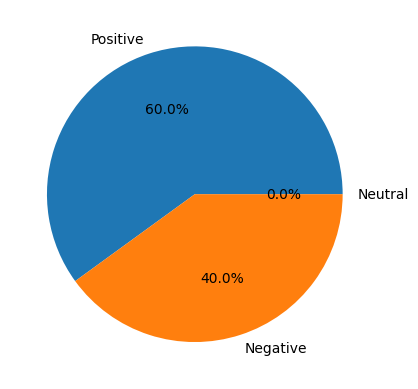

In [25]:
graphical(posCount,negCount,neuCount)

In [29]:
comments = [
    "This is amazing work!",
    "I can see the effort put into this!",
    "This needs some improvement, but the idea is great!",
    "It could be better with a few tweaks.",
    "This is well-structured, but some details are missing.",
    "well nice try but try hard"
]
lis=statistics(comments)
print(lis)

(4, 0, 2)
